#CNN (convolutional neural network)

In [3]:
import zipfile

with zipfile.ZipFile('/content/flowers.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/flowers')


In [4]:
import os

# Шлях до папки train
train_dir = '/content/flowers/train'

print("Train dataset:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Перевіряємо, чи це папка
        print(f"Class: {class_name}, Number of images: {len(os.listdir(class_path))}")

# Шлях до папки test
test_dir = '/content/flowers/test'

print("\nTest dataset:")
print(f"Number of test images: {len(os.listdir(test_dir))}")

Train dataset:
Class: tulip, Number of images: 607
Class: rose, Number of images: 497
Class: dandelion, Number of images: 646
Class: daisy, Number of images: 501
Class: sunflower, Number of images: 495

Test dataset:
Number of test images: 924


In [5]:
!pip install split-folders

import splitfolders

splitfolders.ratio('/content/flowers/train', output="/content/flowers_split", seed=42, ratio=(.8, .2))

Copying files: 2746 files [00:01, 2396.55 files/s]


In [6]:
import os

print("Train classes:", os.listdir('/content/flowers_split/train'))
print("Val classes:", os.listdir('/content/flowers_split/val'))

Train classes: ['tulip', 'rose', 'dandelion', 'daisy', 'sunflower']
Val classes: ['tulip', 'rose', 'dandelion', 'daisy', 'sunflower']


# Сhecking

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/flowers_split/train'
val_dir = '/content/flowers_split/val'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Розмір зображень
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2194 images belonging to 5 classes.
Found 552 images belonging to 5 classes.


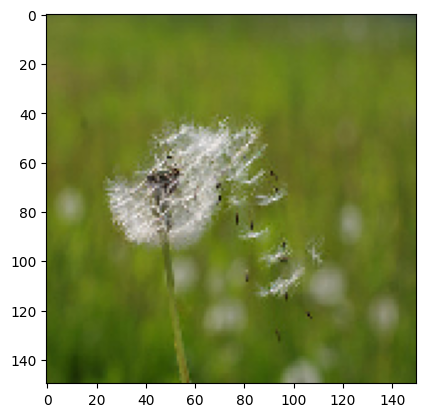

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x, y = next(train_generator)  # Отримати одну партію
plt.imshow(x[0])  # Показати перше зображення
plt.show()

# Create model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(150, 150, 3)),  # Заміна input_shape в першому шарі
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 класів
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9951 - loss: 0.0346 - val_accuracy: 0.5435 - val_loss: 2.0019
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9952 - loss: 0.0352 - val_accuracy: 0.5453 - val_loss: 2.1365
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9931 - loss: 0.0300 - val_accuracy: 0.5924 - val_loss: 2.1621
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9984 - loss: 0.0178 - val_accuracy: 0.5670 - val_loss: 2.2578
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9973 - loss: 0.0220 - val_accuracy: 0.5598 - val_loss: 2.3814
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9999 - loss: 0.0032 - val_accuracy: 0.5598 - val_loss: 2.5610
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9997 - loss: 0.0050 - val_accuracy: 0.5707 - val_loss: 2.3276
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.5833 - v

In [19]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [21]:
#Загальні дані про модель
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,910,993 (121.73 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,273,996 (81.15 MB)

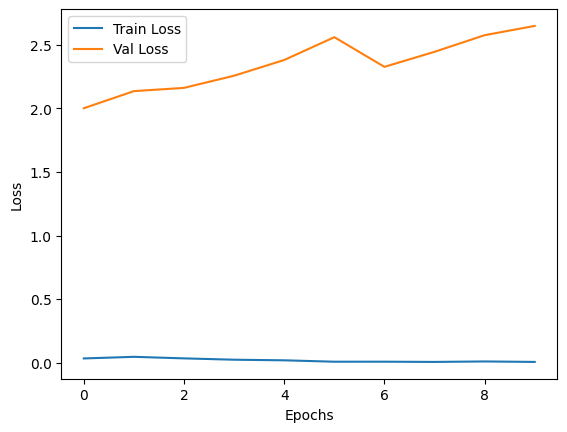

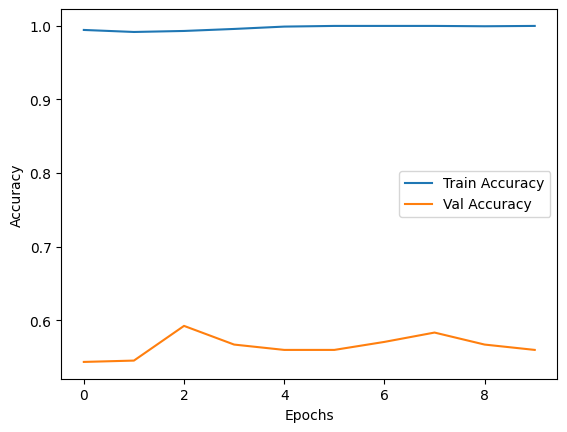

In [20]:
import matplotlib.pyplot as plt

# Графік втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Графік точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import classification_report
# Істинні класи
true_classes = val_generator.classes

In [25]:
# Передбачені ймовірності
predicted_probs = model.predict(val_generator)

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step


In [26]:
# Передбачені класи
predicted_classes = np.argmax(predicted_probs, axis=1)

In [27]:
class_labels = list(val_generator.class_indices.keys())  # Назви класів
classification_rep = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       daisy       0.24      0.16      0.19       101
   dandelion       0.24      0.36      0.29       130
        rose       0.11      0.05      0.07       100
   sunflower       0.15      0.16      0.15        99
       tulip       0.19      0.21      0.20       122

    accuracy                           0.20       552
   macro avg       0.18      0.19      0.18       552
weighted avg       0.19      0.20      0.19       552



In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Істинні класи
true_classes = val_generator.classes

# Передбачені ймовірності
predicted_probs = model.predict(val_generator)

# Передбачені класи
predicted_classes = np.argmax(predicted_probs, axis=1)

# Матриця плутанини
cm = confusion_matrix(true_classes, predicted_classes)

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 454ms/step


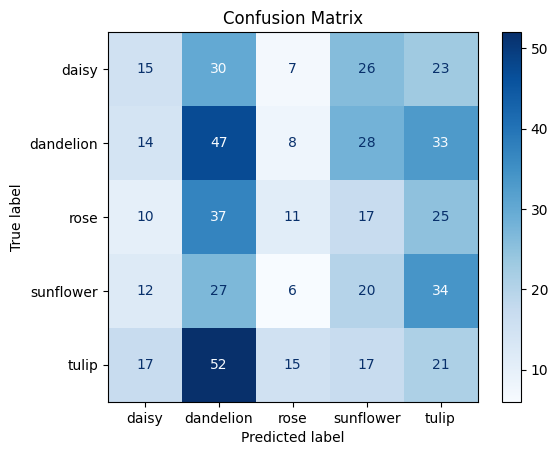

In [30]:
class_labels = list(val_generator.class_indices.keys())  # Отримуємо назви класів

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()